# Ejercicio 11

En este ejercicio vamos a aplicar PCA y LDA a unos datos sintéticos en los que conocemos la población de partida.

## 1 Preparación de los datos
Genera una base de datos sintética formada por dos muestras normales bidimensionales de 100 elementos (usa la función `rmvnorm`, de `library(mvtnorm)`) con la misma matriz de covarianza y distinta media. Crea una variable de tipo factor que permita distinguir a qué clase pertenece cada dato y une las dos muestras en un mismo data frame (`rbind`). Visualiza estos datos en un diagrama de dispersión.

In [1]:
generaGauss2D = function(N, mu1, mu2, sigma1, sigma2, cov12){
  mu = c(mu1, mu2)
  sigma = matrix(c(sigma1*sigma1, cov12, cov12, sigma2*sigma2), nrow = 2, ncol = 2)
  return(MASS::mvrnorm(n = N, mu, Sigma = sigma))
}

In [2]:
N = 100
#Primera dimensión
mux1 = 2
muy1 = 4
sigmax1 = sigmay1 = 1
cov1 = 0.3
#Segunda dimensión
mux2 = 6
muy2 = 3
sigmax2 = sigmay2 = 1
cov2 = 0.3

In [3]:
# Generamos los datos
x1 = generaGauss2D(N, mux1, muy1, sigmax1, sigmay1, cov1)
y1 = as.factor(rep(0, N))
x2 = generaGauss2D(N, mux2, muy2, sigmax2, sigmay2, cov2)
y2 = as.factor(rep(1, N))

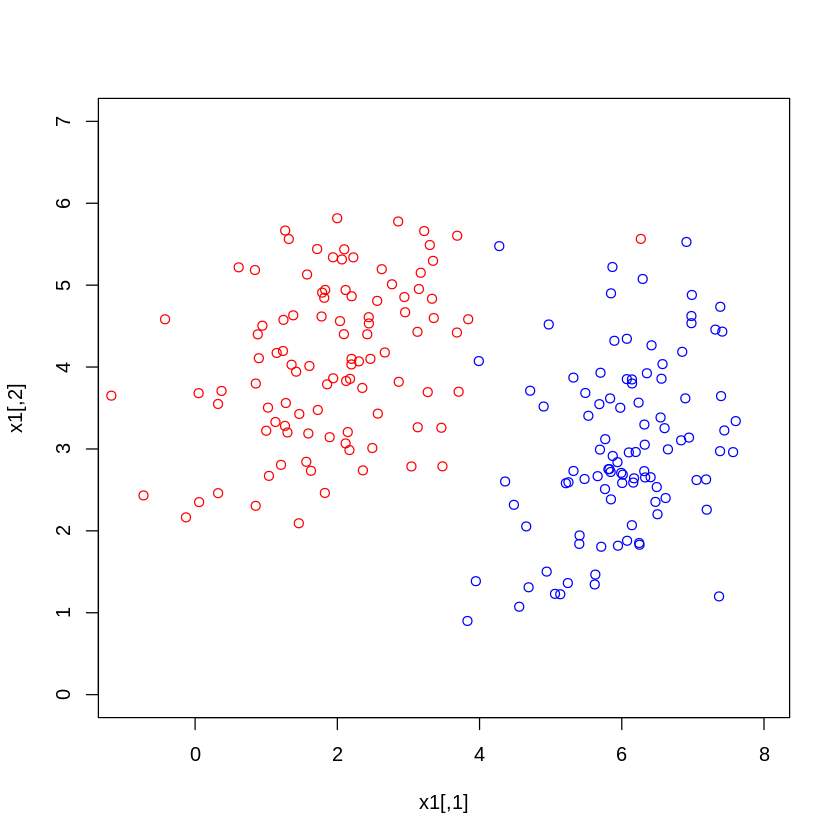

In [4]:
# Juntamos en dataframe
dfx = rbind(x1, x2)
dfy = rbind(matrix(y1), matrix(y2))
plot(x1, xlim = c(-1,8), ylim = c(0,7), col = "red")
points(x2, col = "blue")

## 2 Aplicación de PCA
2.1 Aplica un PCA a estos datos y representa el resultado (`plot`). Los PCs representan las proyecciones en este nuevo espacio dado por las EOFs. 

2.2 Representa esas nuevas direcciones en un diagrama de dispersión junto con los datos originales (puedes usar `arrows` para indicar las direcciones). 

2.3 Calcula la proyección de los datos originales sobre la primera nueva dirección, EOF1, ($X \approx \bar{X} + Z_{1}P_{1}^{t}$) y añade al gráfico de dispersión el segmento que une cada dato original con su proyección (`segments`).

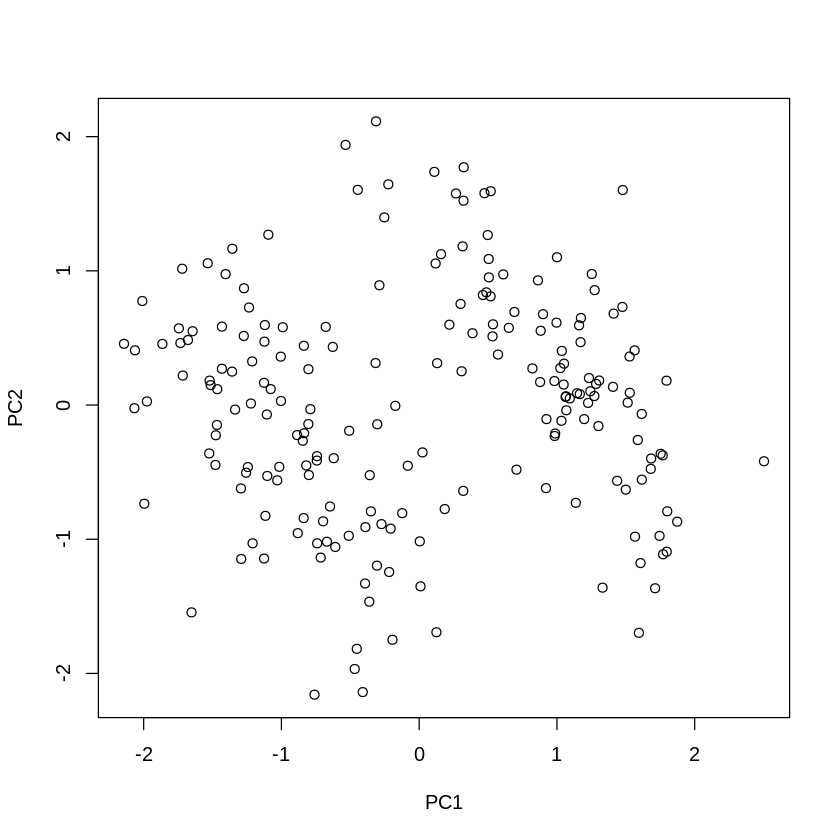

In [5]:
# 2.1
PCA = prcomp(dfx, center=TRUE, scale=TRUE)
plot(PCA$x)

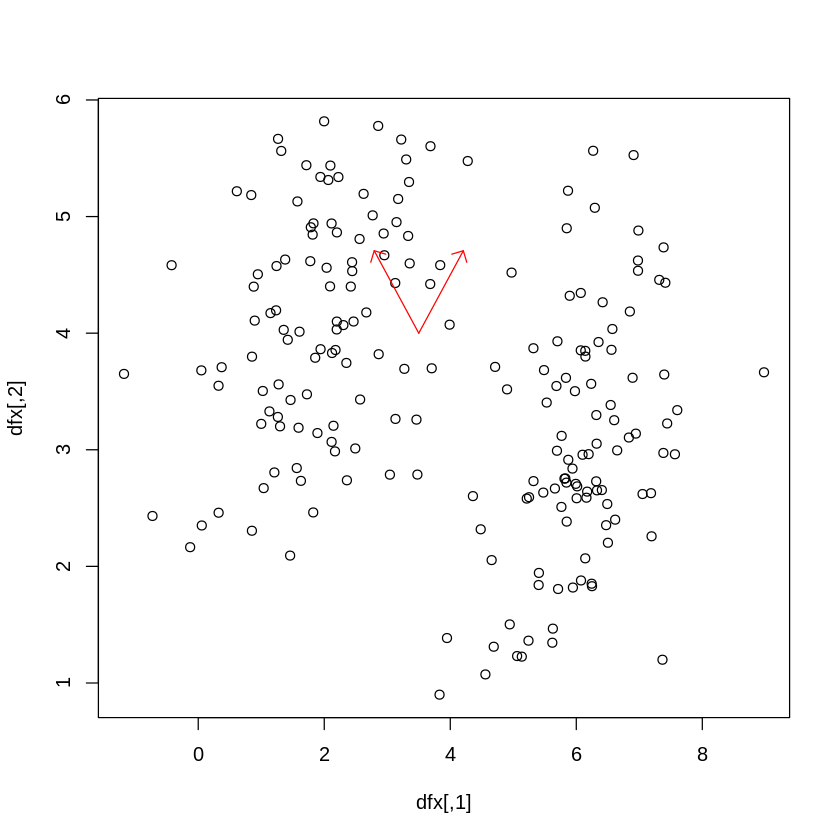

In [6]:
# 2.2
eigvec = PCA$rotation
center = c(3.5,4)
plot(dfx)
arrows(x0=center[1], y0=center[2],
       x1=center[1]+eigvec[1], y1=center[2]+eigvec[3],
       angle=45, length=0.1, col = "red")
arrows(x0=center[1], y0=center[2],
       x1=center[1]+eigvec[2], y1=center[2]+eigvec[4],
       angle=45, length=0.1, col = "red")

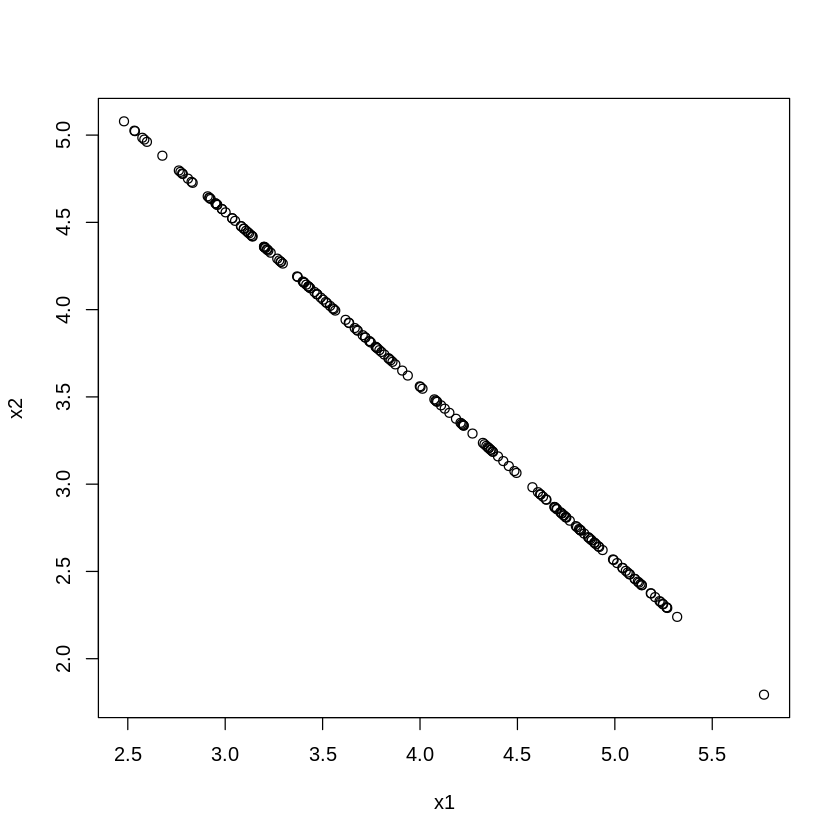

In [7]:
# 2.3 Calcula la proyección de los datos originales
# sobre la primera nueva dirección, EOF1, ($X \approx \bar{X} + Z_{1}P_{1}^{t}$)
# y añade al gráfico de dispersión el segmento que une cada dato original con su proyección
meanX = colMeans(dfx)

meanXrep = data.frame(x1 = rep(meanX[1], 2*N), x2 = rep(meanX[2], 2*N))
Xrecup = meanXrep + PCA$x[,1] %*% t(eigvec[,1])
plot(Xrecup) ##????

In [8]:
str(PCA)

List of 5
 $ sdev    : num [1:2] 1.134 0.845
 $ rotation: num [1:2, 1:2] 0.707 -0.707 0.707 0.707
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "PC1" "PC2"
 $ center  : num [1:2] 4 3.56
 $ scale   : num [1:2] 2.29 1.14
 $ x       : num [1:200, 1:2] -0.468 -0.306 -0.678 0.32 -1.976 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "PC1" "PC2"
 - attr(*, "class")= chr "prcomp"


## 3 Aplicación de LDA
3.1 Utiliza la información de las clases para aplicar un LDA a estos datos y representa el resultado (`plot`).

3.2 Representa un diagrama de dispersión con los datos originales y añade los centroides de las dos clases y la nueva dirección. Ver la ayuda de `?lda` para identificar esos parámetros en la salida de la función.